In [134]:
import numpy as np
from numpy.linalg import *
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import sklearn
import seaborn as sns
%matplotlib inline

# Linear regression for single variable

# Load dataset and transfer them into dataframe format

In [105]:
df = pd.read_csv("ex1data1.txt", names=['Population', 'Profit'],usecols=(0,1))

# Plot the data points

(-5, 25)

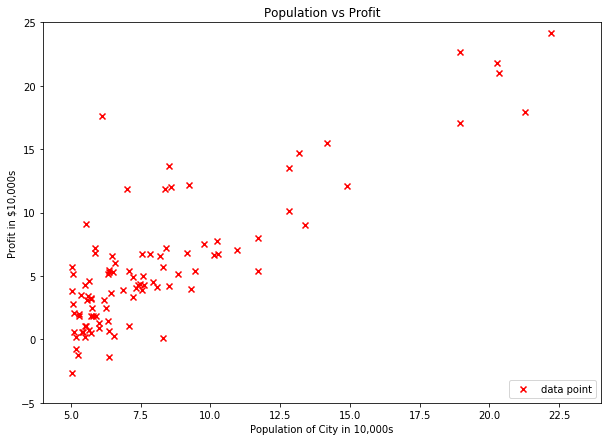

In [106]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(df['Population'],df['Profit'],label="data point",color="r",marker="x")
ax.set_ylabel("Profit in $10,000s")
ax.set_xlabel("Population of City in 10,000s")
ax.set_title("Population vs Profit")
ax.legend(loc=4)
ax.set_xlim(4,24)
ax.set_ylim(-5,25)

# Add the constant 1

In [107]:
df.insert(0,"Ones",1)

In [108]:
cols=df.shape[-1]

In [109]:
X=df.iloc[:,0:cols-1]
Y=df.iloc[:,cols-1:cols]

In [110]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [114]:
Y_train.shape

(72, 1)

In [7]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


# Trnansfer the series to matrixes

In [115]:
X=np.matrix(X_train.values)
Y=np.matrix(Y_train.values)

# Initialize the theta to [0,0]

In [116]:
theta=np.matrix(np.array([0,0]))

In [117]:
X.shape,theta.shape,Y.shape

((72, 2), (1, 2), (72, 1))

# Define the compute cost function

In [13]:
def computeCost(X,Y,theta):
    inner=np.power(((X * theta.T)-Y),2)
    return np.sum(inner)/(2 * len(X))

In [118]:
computeCost(X,Y,theta)

37.110497904287499

# Define the gradient descent function

In [15]:
def gradientDescent(X,Y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    
    for i in range(iters):
        error=(X*theta.T)-Y
        for j in range(parameters):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))
            
        theta=temp
        cost[i]=computeCost(X,Y,theta)
    
    return theta,cost

In [57]:
alpha=0.001
iters=10000

In [119]:
g,cost=gradientDescent(X,Y,theta,alpha,iters)
g

matrix([[-3.90612487,  1.20029578]])

# Calculate the theta by sklearn, least square

In [120]:
lm=linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
lm.coef_[0][1],lm.intercept_[0]

(1.2010649380311593, -3.9142585508694694)

In [132]:
Y_pred = lm.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R^2:",metrics.r2_score(Y_test, Y_pred))

RMSE: 2.72716762494
R^2: 0.332773079538


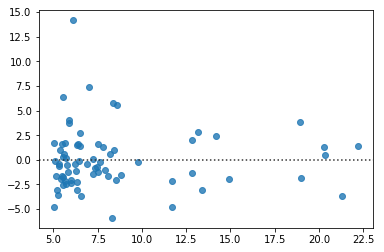

In [144]:
sns.residplot(X_train.iloc[:,1:],Y_train)

# Draw the data points, regression line by gradient descent and by least square

(-5, 25)

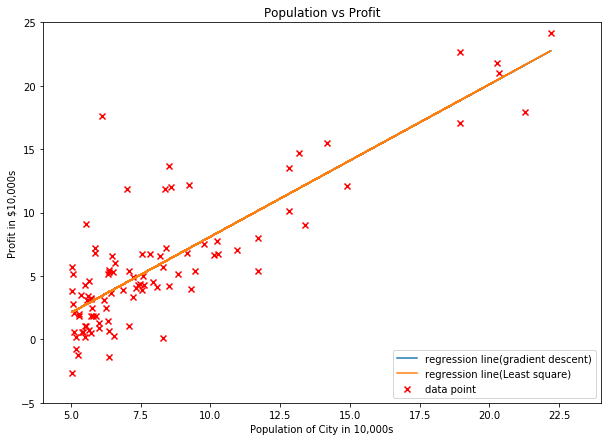

In [133]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(df['Population'],df["Population"]*g[0,1]+g[0,0],label="regression line(gradient descent)")
ax.plot(df['Population'],df["Population"]*lm.coef_[0][1]+lm.intercept_[0],label="regression line(Least square)")
ax.scatter(df['Population'],df['Profit'],label="data point",color="r",marker="x")
ax.set_ylabel("Profit in $10,000s")
ax.set_xlabel("Population of City in 10,000s")
ax.set_title("Population vs Profit")
ax.legend(loc=4)
ax.set_xlim(4,24)
ax.set_ylim(-5,25)

# Draw the history of cost during gradient descent

(0, 1000)

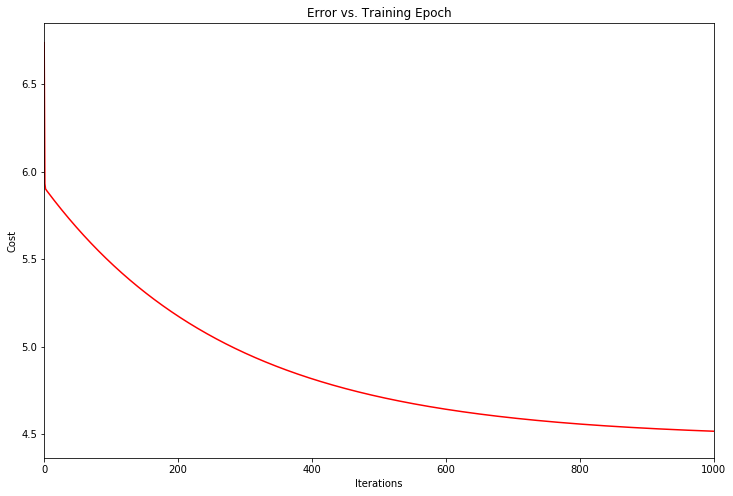

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
ax.set_xlim(0,1000)

# predictions on profits in areas of 35,000 and 70,000 people

In [22]:
profits_35=g[0,1]*3.5+g[0,0]

In [23]:
profits_7=g[0,1]*7+g[0,0]

In [24]:
profits_35,profits_7

(0.27983691398645361, 4.4554546482411421)

# Linear regression for multiple variables

In [145]:
df1=pd.read_csv("ex1data2.txt",names=["Size","Bedrooms","Price"],usecols=(0,1,2))

In [35]:
df1.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# Normalization the data

In [146]:
df1=(df1-df1.mean())/df1.std()
df1.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


# Insert constant 1

In [147]:
df1.insert(0,"Ones",1)

In [148]:
df1.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [214]:
df1[["Size","Bedrooms"]]

,Size,Bedrooms
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417
5,-0.019732,1.090417
6,-0.587240,-0.223675
7,-0.721881,-0.223675
8,-0.781023,-0.223675
9,-0.637573,-0.223675


# Transfer the series to matrixes

In [194]:
cols=df1.shape[1]
X2=df1.iloc[:,0:cols-1]
Y2=df1.iloc[:,cols-1:cols]

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, random_state=1)

In [197]:
X2=np.matrix(X2.values)
Y2=np.matrix(Y2.values)

In [198]:
theta2=np.matrix(np.array([0,0,0]))

In [199]:
alpha=0.01
iters=3000
g2,cost2=gradientDescent(X2,Y2,theta2,alpha,iters)

In [200]:
computeCost(X2,Y2,g2)

0.13068648053957893

In [201]:
g2

matrix([[ -1.10656165e-16,   8.84764871e-01,  -5.31777031e-02]])

(0, 1000)

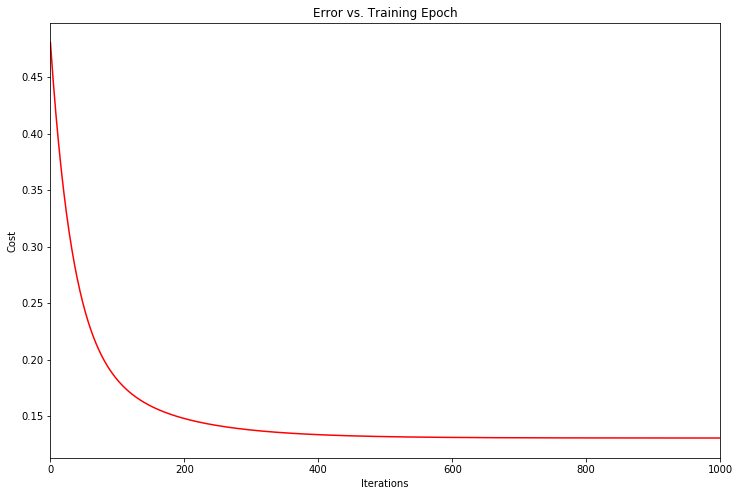

In [202]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
ax.set_xlim(0,1000)

In [203]:
lm2=linear_model.LinearRegression()
lm2.fit(X2_train,Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
print(lm2.coef_[0])
print(lm2.intercept_)

[ 0.          0.95085456 -0.11102134]
[ 0.01780181]


# Normal equation

In [205]:
XT=X2.T
print(np.matmul(np.matmul(pinv(np.matmul(XT,X2)),XT),Y2))

[[ -2.46811063e-17]
 [  8.84765988e-01]
 [ -5.31788197e-02]]


In [206]:
Y2_pred = lm2.predict(X2_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y2_test, Y2_pred)))
print("R^2:",metrics.r2_score(Y2_test, Y2_pred))

RMSE: 0.679009641162
R^2: 0.533797048256


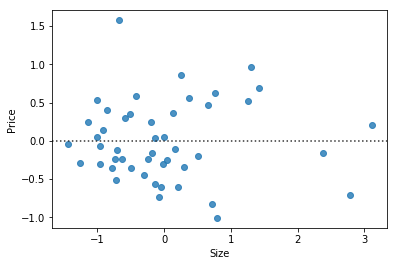

In [164]:
sns.residplot(df1['Size'],df1["Price"])